In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = "cc_results_2024"

In [2]:
def load_scores(data_set):
    
    
    with open(f"{data_dir}/{data_set}.txt") as f:
        lines = f.readlines()

    pivot_scores = []
    vote_scores = []

    for i in range(len(lines)):
        cur_line = lines[i]
        
        # if "k = " in cur_line:
        #     print(cur_line.strip())
        
        if "Pivot scores" in cur_line:
            next_line = lines[i + 1]
            vals = next_line.split()
            pivot_scores.append(list(map(int, vals)))

        if "Vote scores" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            vote_scores.append(list(map(int, vals)))

    return pivot_scores, vote_scores 

def load_pm_scores(data_set):
    
    with open(f"{data_dir}/{data_set}_pm.txt") as f:
        lines = f.readlines()

    pm_scores = []

    for i in range(len(lines)):
        cur_line = lines[i]

        
        if "PM scores" in cur_line:
            next_line = lines[i + 1]
            vals = next_line.split()
            pm_scores.append(list(map(int, vals)))

    return pm_scores 
    
def load_imp_scores(data_set):
    
    with open(f"{data_dir}/{data_set}_imp.txt") as f:
        lines = f.readlines()

    imp_scores = []

    for i in range(len(lines)):
        cur_line = lines[i]

        
        if "Improved scores" in cur_line:
            next_line = lines[i + 1]
            vals = next_line.split()
            imp_scores.append(list(map(int, vals)))

    return imp_scores 
        
def load_ilp_scores(data_set):
    with open(f"{data_dir}/{data_set}_ilp.txt") as f:
        lines = f.readlines()

    ilp_scores = []

    for i in range(len(lines)):
        cur_line = lines[i]
        if "LP Objective value" in cur_line:
            vals = cur_line.split()[-1]
            ilp_scores.append(float(vals))
    return ilp_scores

9
9
9


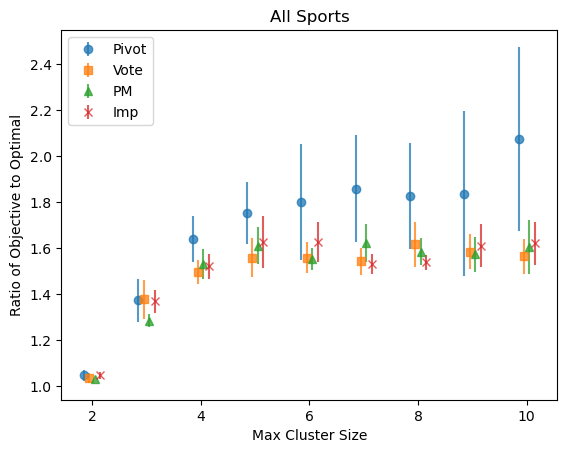

9
9
9


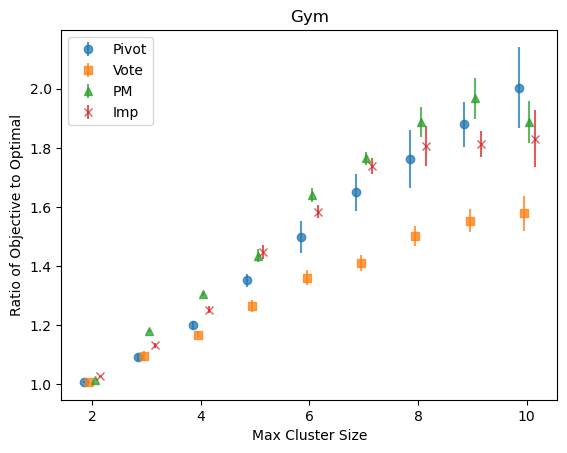

9
9
9


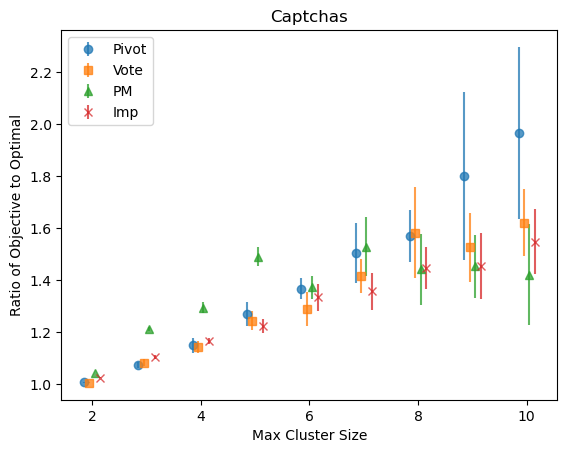

9
9
9


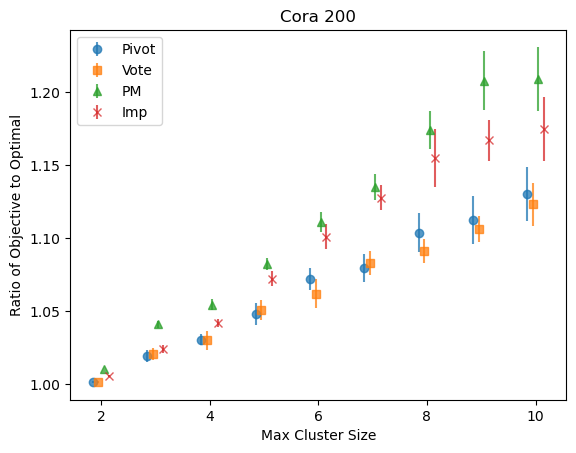

In [3]:
### GATHER RESULTS

def plot_line_graph(data_set, title):

    pivot_scores, vote_scores = load_scores(data_set)
    ilp_scores = load_ilp_scores(data_set)
    pm_scores = load_pm_scores(data_set)
    imp_scores = load_imp_scores(data_set)
    
    print(len(pivot_scores))
    print(len(pm_scores))
    print(len(imp_scores))

    x_vals = list(range(2, 11))

    pivot_adjust = [np.mean(pivot_scores[i]) / ilp_scores[i] for i in range(len(x_vals))]
    vote_adjust = [np.mean(vote_scores[i]) / ilp_scores[i] for i in range(len(x_vals))]
    pm_adjust = [np.mean(pm_scores[i]) / ilp_scores[i] for i in range(len(x_vals))]
    imp_adjust = [np.mean(imp_scores[i]) / ilp_scores[i] for i in range(len(x_vals))]

    # ERROR BAR

    pivot_errs = [np.std(pivot_scores[i])  / ilp_scores[i] for i in range(len(x_vals))]
    vote_errs = [np.std(vote_scores[i])  / ilp_scores[i] for i in range(len(x_vals))]
    pm_errs = [np.std(pm_scores[i])  / ilp_scores[i] for i in range(len(x_vals))]
    imp_errs = [np.std(imp_scores[i])  / ilp_scores[i] for i in range(len(x_vals))]
      
    # print(pivot_adjust)
    # print(vote_adjust)
    
    # plt.scatter(x_vals, pivot_adjust, label = "Pivot")
    # plt.scatter(x_vals, vote_adjust, label = "Vote")
    
    pivot_x = [x_vals[i] - 0.15 for i in range(len(x_vals))]
    vote_x = [x_vals[i] - 0.05 for i in range(len(x_vals))]
    pm_x = [x_vals[i] + 0.05 for i in range(len(x_vals))]
    imp_x = [x_vals[i] + 0.15 for i in range(len(x_vals))]

    plt.errorbar(pivot_x, pivot_adjust, pivot_errs, fmt="o", label="Pivot", alpha=0.75)
    plt.errorbar(vote_x, vote_adjust, vote_errs, fmt="s", label="Vote", alpha=0.75)
    plt.errorbar(pm_x, pm_adjust, pm_errs, fmt="^", label="PM", alpha=0.75)
    plt.errorbar(imp_x, imp_adjust, imp_errs, fmt="x", label="Imp", alpha=0.75)

    plt.xlabel("Max Cluster Size")
    plt.ylabel("Ratio of Objective to Optimal")
    plt.title(title)
    plt.legend(loc="upper left")
    plt.savefig(f"{data_dir}/{data_set}.png")
    plt.show()

plot_line_graph("cor_allsports", "All Sports")
plot_line_graph("cor_gym", "Gym")
plot_line_graph("cor_captchas", "Captchas")
plot_line_graph("cor_cora200", "Cora 200")


